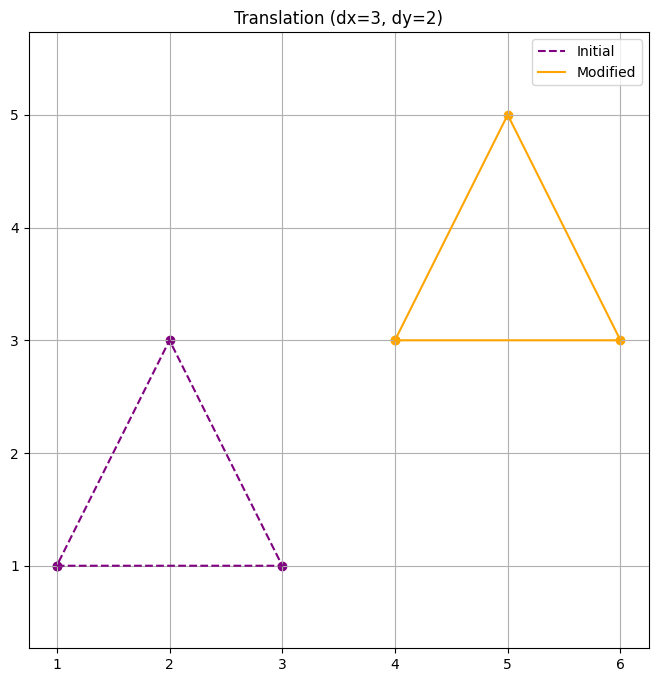

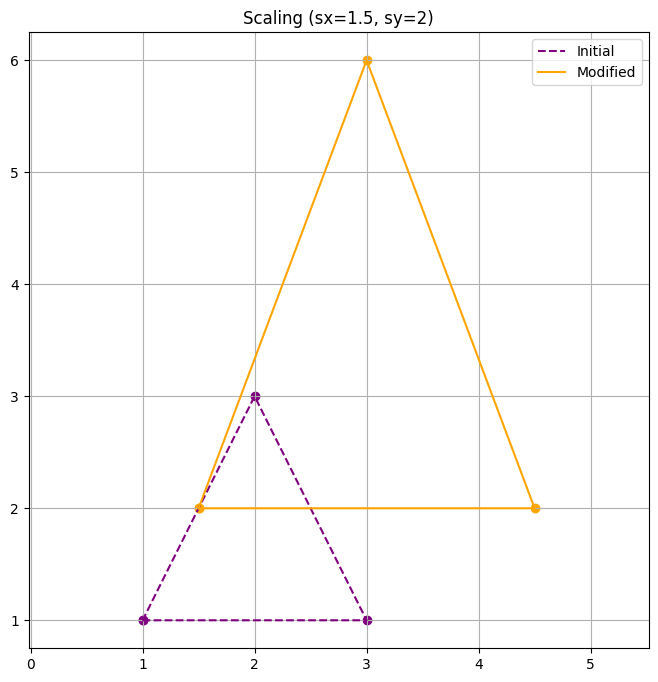

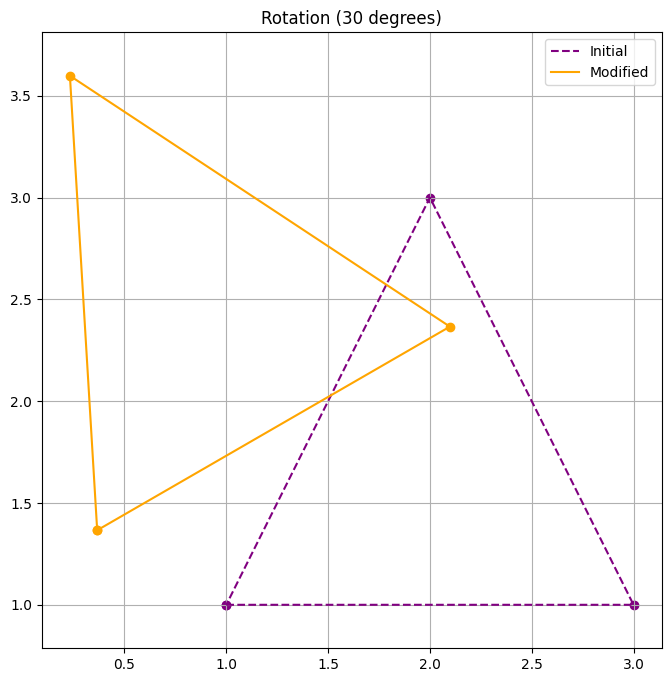

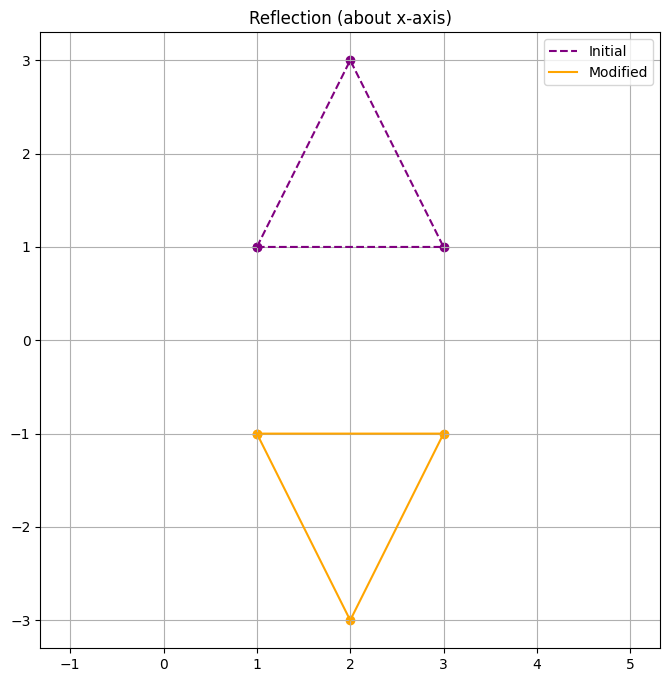

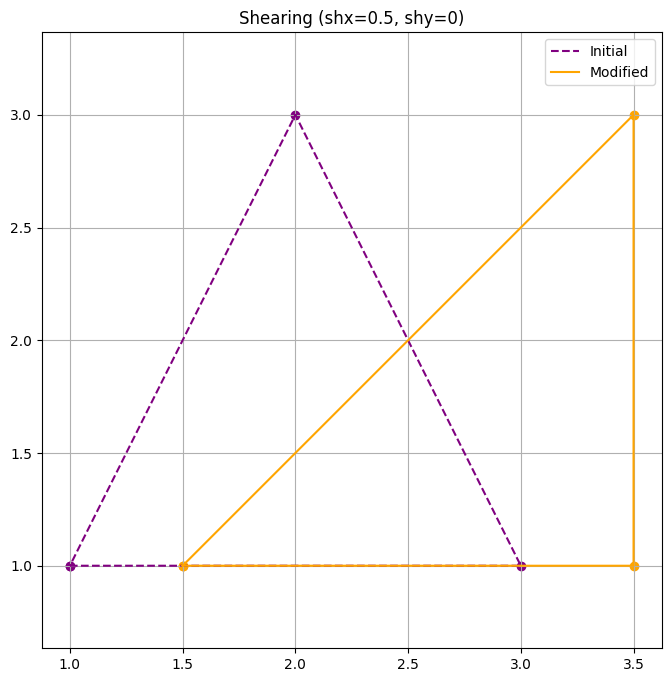

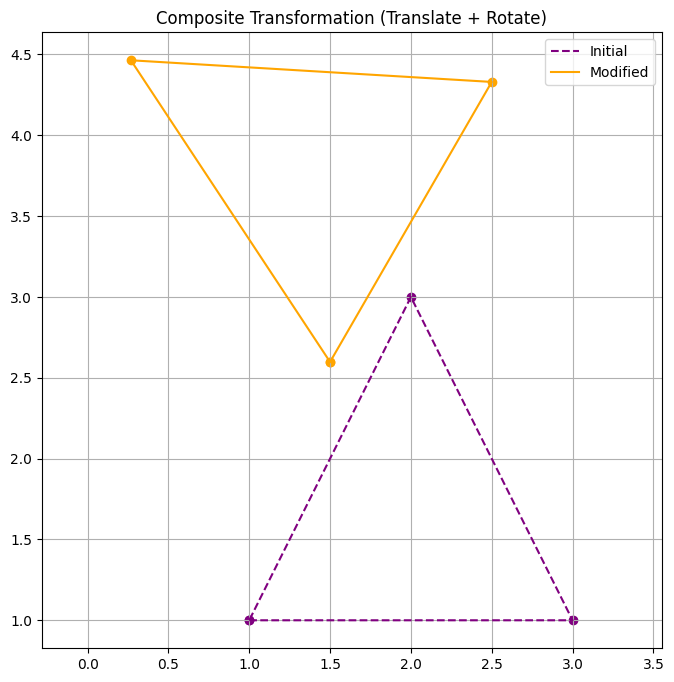

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_shapes(initial_shape, modified_shape, graph_title, orig_label='Initial', mod_label='Modified', orig_color='purple', mod_color='orange'):
    """Plot the initial and modified shapes on the same graph."""
    initial_shape = np.vstack((initial_shape, initial_shape[0]))  # Close the shape
    modified_shape = np.vstack((modified_shape, modified_shape[0]))

    plt.figure(figsize=(8, 8))
    plt.plot(initial_shape[:, 0], initial_shape[:, 1], color=orig_color, label=orig_label, linestyle='--')
    plt.scatter(initial_shape[:, 0], initial_shape[:, 1], color=orig_color)

    plt.plot(modified_shape[:, 0], modified_shape[:, 1], color=mod_color, label=mod_label)
    plt.scatter(modified_shape[:, 0], modified_shape[:, 1], color=mod_color)

    plt.title(graph_title)
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.show()

def perform_translation(shape, delta_x, delta_y):
    """Translate the shape by delta_x and delta_y."""
    translation_mat = np.array([[1, 0, delta_x], [0, 1, delta_y], [0, 0, 1]])
    return apply_matrix(shape, translation_mat)

def perform_scaling(shape, factor_x, factor_y):
    """Scale the shape along x and y axes by factor_x and factor_y."""
    scaling_mat = np.array([[factor_x, 0, 0], [0, factor_y, 0], [0, 0, 1]])
    return apply_matrix(shape, scaling_mat)

def perform_rotation(shape, degrees):
    """Rotate the shape counterclockwise by a given angle in degrees."""
    radians = np.radians(degrees)
    rotation_mat = np.array([[np.cos(radians), -np.sin(radians), 0],
                             [np.sin(radians),  np.cos(radians), 0],
                             [0, 0, 1]])
    return apply_matrix(shape, rotation_mat)

def perform_reflection(shape, axis='x'):
    """Reflect the shape across the specified axis ('x', 'y', or 'origin')."""
    if axis == 'x':
        reflection_mat = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    elif axis == 'y':
        reflection_mat = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    else:  # Origin reflection
        reflection_mat = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, 1]])
    return apply_matrix(shape, reflection_mat)

def perform_shearing(shape, shear_x, shear_y):
    """Shear the shape along x and y axes by shear_x and shear_y."""
    shear_mat = np.array([[1, shear_x, 0], [shear_y, 1, 0], [0, 0, 1]])
    return apply_matrix(shape, shear_mat)

def apply_matrix(shape, transformation_mat):
    """Apply a transformation matrix to the given shape."""
    shape_homogeneous = np.hstack((shape, np.ones((shape.shape[0], 1))))  # Convert to homogeneous coordinates
    transformed_shape = shape_homogeneous @ transformation_mat.T
    return transformed_shape[:, :2]  # Convert back to 2D

# Define the triangle vertices
triangle = np.array([[1, 1], [3, 1], [2, 3]])

# Translation
translated_triangle = perform_translation(triangle, 3, 2)
plot_shapes(triangle, translated_triangle, "Translation (dx=3, dy=2)")

# Scaling
scaled_triangle = perform_scaling(triangle, 1.5, 2)
plot_shapes(triangle, scaled_triangle, "Scaling (sx=1.5, sy=2)")

# Rotation
rotated_triangle = perform_rotation(triangle, 30)
plot_shapes(triangle, rotated_triangle, "Rotation (30 degrees)")

# Reflection
reflected_triangle = perform_reflection(triangle, axis='x')
plot_shapes(triangle, reflected_triangle, "Reflection (about x-axis)")

# Shearing
sheared_triangle = perform_shearing(triangle, 0.5, 0)
plot_shapes(triangle, sheared_triangle, "Shearing (shx=0.5, shy=0)")

# Composite Transformation (Translation + Rotation)
composite_triangle = perform_rotation(perform_translation(triangle, 2, -1), 60)
plot_shapes(triangle, composite_triangle, "Composite Transformation (Translate + Rotate)")


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(title, img):
    """Display an image with a title."""
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
input_image = cv2.imread('/content/Screenshot 2025-01-23 100630.png')
if input_image is None:
    print("Image not found. Please check the file path.")
else:
    show_image("Original Image", input_image)

# 1. Image Translation
def translate(img, tx, ty):
    height, width = img.shape[:2]
    matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_img = cv2.warpAffine(img, matrix, (width, height))
    return translated_img

translated_img = translate(input_image, 50, 30)
show_image("Translated Image (tx=50, ty=30)", translated_img)

# 2. Image Reflection
def reflect(img, direction='horizontal'):
    if direction == 'horizontal':
        reflected_img = cv2.flip(img, 1)
    elif direction == 'vertical':
        reflected_img = cv2.flip(img, 0)
    else:
        reflected_img = cv2.flip(img, -1)
    return reflected_img

reflected_img = reflect(input_image, 'horizontal')
show_image("Reflected Image (Horizontal)", reflected_img)

# 3. Image Rotation
def rotate(img, angle):
    height, width = img.shape[:2]
    matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    rotated_img = cv2.warpAffine(img, matrix, (width, height))
    return rotated_img

rotated_img = rotate(input_image, 45)
show_image("Rotated Image (45 degrees)", rotated_img)

# 4. Image Scaling
def scale(img, scale_x, scale_y):
    scaled_img = cv2.resize(img, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)
    return scaled_img

scaled_img = scale(input_image, 1.5, 1.5)
show_image("Scaled Image (Scale 1.5x, 1.5y)", scaled_img)

# 5. Image Cropping
def crop(img, start_x, start_y, width, height):
    cropped_img = img[start_y:start_y + height, start_x:start_x + width]
    return cropped_img

cropped_img = crop(input_image, 50, 50, 200, 150)
show_image("Cropped Image", cropped_img)

# 6. Shearing in X-axis
def shear_x(img, shear_factor):
    height, width = img.shape[:2]
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_x_img = cv2.warpAffine(img, shear_matrix, (width + int(height * shear_factor), height))
    return sheared_x_img

sheared_x_img = shear_x(input_image, 0.3)
show_image("Sheared Image (X-axis)", sheared_x_img)

# 7. Shearing in Y-axis
def shear_y(img, shear_factor):
    height, width = img.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_y_img = cv2.warpAffine(img, shear_matrix, (width, height + int(width * shear_factor)))
    return sheared_y_img

sheared_y_img = shear_y(input_image, 0.3)
show_image("Sheared Image (Y-axis)", sheared_y_img)


Output hidden; open in https://colab.research.google.com to view.